In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df1 = pd.read_csv('MCF10A_vs_Mighell.csv', index_col=False)

# Data processing

In [3]:
print(df1.head())

   Unnamed: 0 variant  Cum_score  MCF10A score  std_dev  std_err  AA position
0           0     K6E   1.623520        0.3311  0.06073  0.03506            6
1           1     K6I   1.888279        0.4544  0.04539  0.02621            6
2           2    R15S   2.581101        0.3870  0.05989  0.03458           15
3           3    P38H   4.783403        0.3521  0.10320  0.05958           38
4           4    G44D   3.080331        0.6232  0.02915  0.01683           44


In [4]:
df1 = df1.iloc[:,1:4]
print(df1.head())

  variant  Cum_score  MCF10A score
0     K6E   1.623520        0.3311
1     K6I   1.888279        0.4544
2    R15S   2.581101        0.3870
3    P38H   4.783403        0.3521
4    G44D   3.080331        0.6232


In [5]:
# MinMax scaling of data
from sklearn.preprocessing import MinMaxScaler

data = df1.iloc[:, 1:4]
data = pd.DataFrame(MinMaxScaler().fit_transform(data))
data.columns = ['Mighell score', 'MCF10A score']
print(data)

    Mighell score  MCF10A score
0        0.354348      0.236107
1        0.399496      0.363233
2        0.517640      0.293742
3        0.893189      0.257759
4        0.602772      0.537272
5        0.040639      0.483555
6        0.181617      0.170739
7        0.093048      0.235076
8        0.072332      0.299928
9        0.607596      0.630684
10       0.483497      0.802351
11       0.036416      0.401588
12       0.302716      0.918961
13       0.852433      0.552840
14       0.912329      0.801732
15       0.836577      0.615012
16       0.252705      0.443757
17       0.458281      0.900299
18       0.329463      0.741623
19       1.000000      0.806269
20       0.615237      0.836478
21       0.425396      0.447469
22       0.605809      0.382204
23       0.403427      0.388391
24       0.650784      0.544695
25       0.322941      0.953603
26       0.369285      0.553150
27       0.090041      0.285493
28       0.129408      0.465409
29       0.000000      0.436952
30      

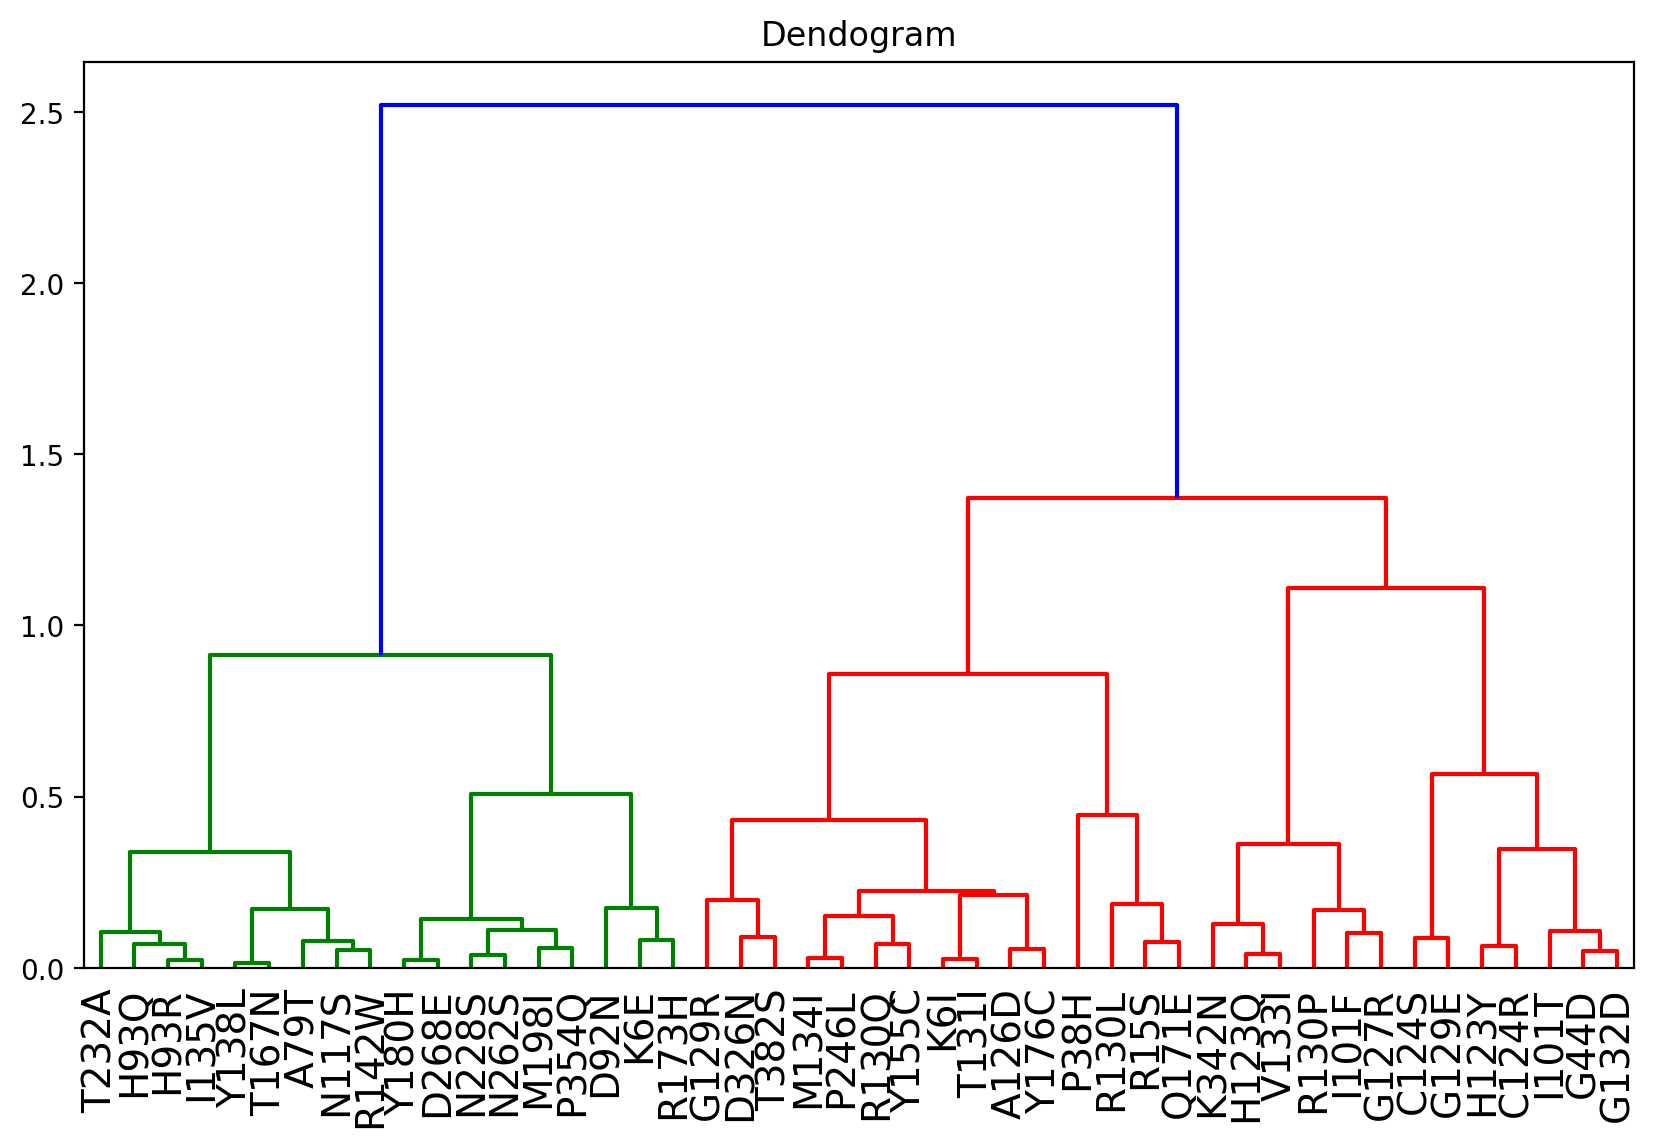

In [6]:
# create a dendogram to determine how many clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,6), dpi=200)  
plt.title("Dendogram")   

dend = shc.dendrogram(shc.linkage(data, method='ward'), 
                      labels=df1['variant'].tolist(),
                      leaf_font_size=14, leaf_rotation=90)

mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/Mighell_MCF10A_dendogram.pdf', transparent=True)

plt.show()

In [7]:
# create clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
# the "cluster" method returns the names of the clusters that each data point belongs to.
cluster.fit_predict(data)

array([2, 5, 1, 1, 0, 4, 2, 4, 4, 0, 3, 4, 3, 0, 0, 0, 5, 3, 5, 0, 3, 5,
       1, 5, 0, 3, 5, 4, 4, 4, 5, 4, 1, 2, 5, 2, 2, 2, 4, 5, 2, 2, 5, 3,
       2, 5])

# Mighell vs MCF10A

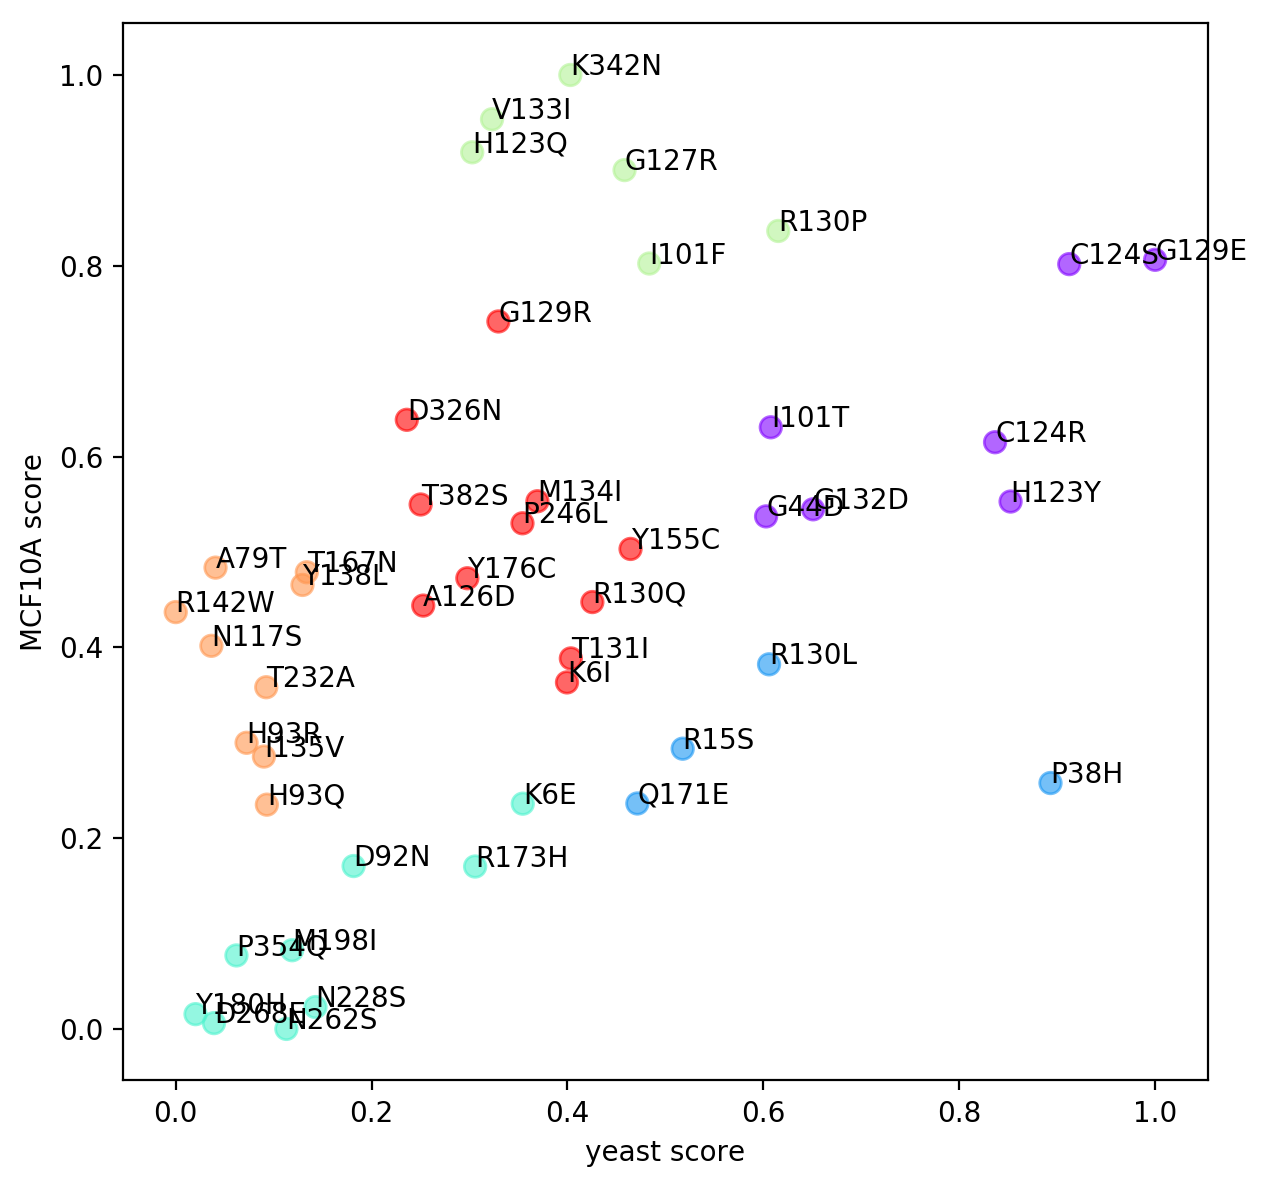

In [8]:
# visualize the clusters
fig = plt.figure(figsize=(7,7), dpi=200)
ax = fig.add_subplot(111)

x = data['Mighell score']
y = data['MCF10A score']

for i in range(len(cluster.labels_)): #plot each point + it's index as text above
 ax.text(x[i], y[i],  '%s' % (str(df1.iloc[i,0])), size=10, color='k') 

ax.scatter(x, y, alpha=0.6, s=60, c=cluster.labels_, cmap='rainbow')

ax.set_xlabel('yeast score')
ax.set_ylabel('MCF10A score')

# output figure
mpl.rcParams['ps.fonttype'] = 42
plt.savefig("Output PDFs/MCF10A vs Mighell.pdf", transparent=True)

plt.show()

In [39]:
# Pearson correlation
from scipy.stats import pearsonr
corr = pearsonr(data['Cum_score'], data['MCF10A score'])[0]
p_val = pearsonr(data['Cum_score'], data['MCF10A score'])[1]
print('Pearson Correlation: {0:.4f}'.format(corr))
print('Two Tailed P Value: {0:.4f}'.format(p_val))

Pearson Correlation: 0.4659
Two Tailed P Value: 0.0014
